In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from skimage.metrics import structural_similarity as ssim
import os
import random

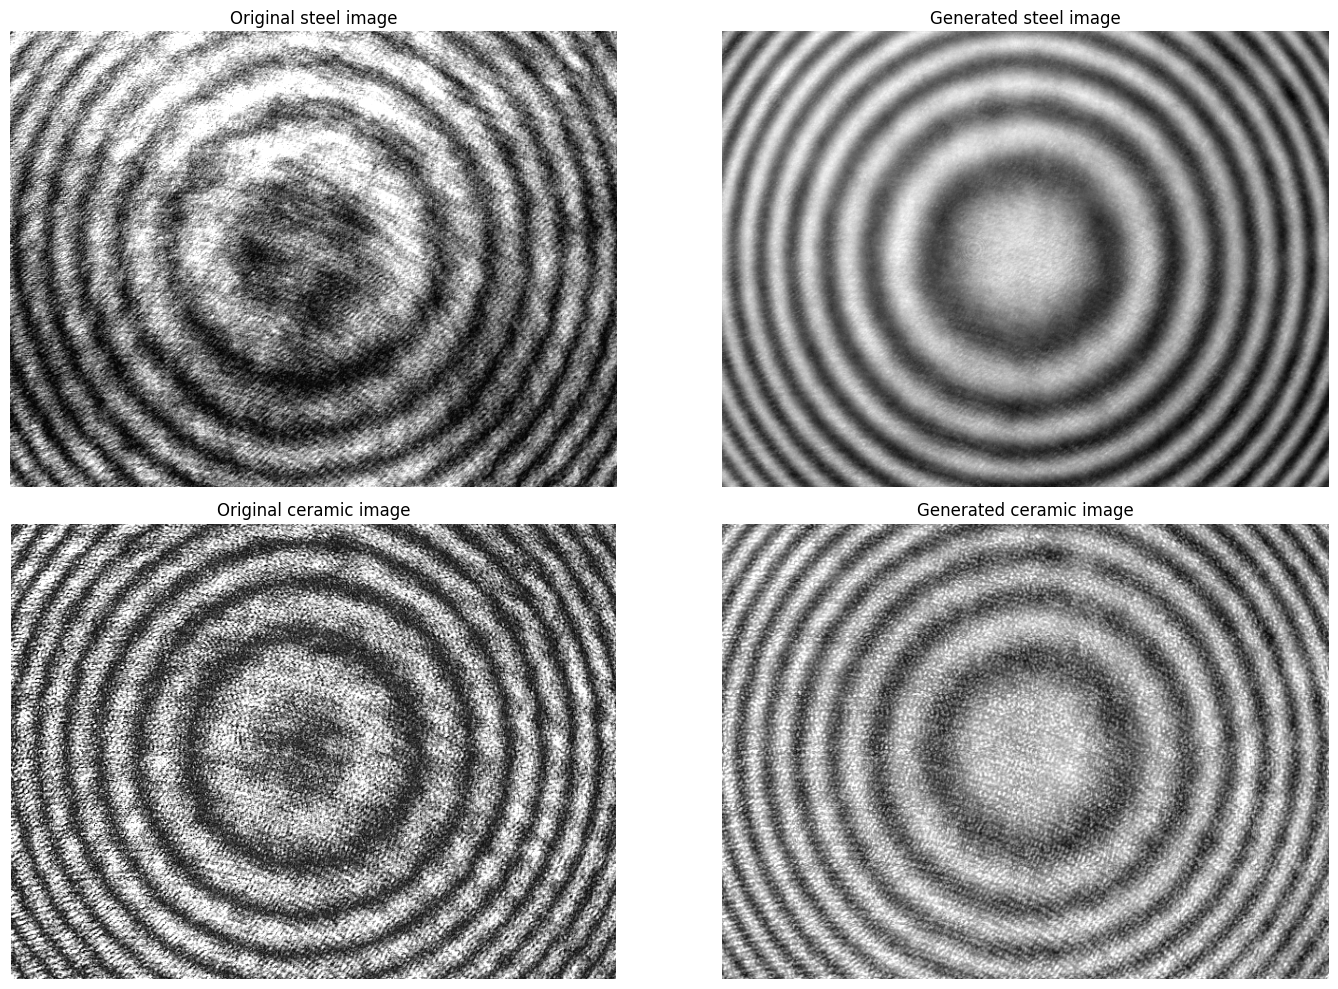

In [3]:
image_paths = [
    "../data/samples/steel_raw_00000.png",
    "../data/samples/average_00021.png",
    "../data/samples/ceramic_raw_00000.png",
    "../data/samples/average_ceramic_00021.png",
]

titles = [
    "Original steel image",
    "Generated steel image",
    "Original ceramic image",
    "Generated ceramic image",
]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()
for i, (path, title) in enumerate(zip(image_paths, titles)):
    img = mpimg.imread(path)
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# Compute the average similarity between raw ceramic and generated ceramic image

In [14]:
def draw_random_files(directory, n):
    png_files = [file for file in os.listdir(directory) if file.endswith('.png')]
    if n > len(png_files):
        raise ValueError("Number of files to draw exceeds the number of PNG files in the directory.")
    return random.sample(png_files, n)

def crop_image(image, pixels):
    height, width = image.shape[:2]
    cropped_image = image[pixels:height-pixels, pixels:width-pixels]
    return cropped_image

In [17]:
path_raw_ceramic = "../data/raw/ceramic/1channel/"
path_gen_ceramic = "../data/generated/average/ceramic/"

n = 1000

raw_ceramic_files = draw_random_files(path_raw_ceramic, n)
gen_ceramic_files = draw_random_files(path_gen_ceramic, n)

In [18]:
mse_total = 0
ssim_total = 0
for i in range(n):
    raw_ceramic = cv2.imread(path_raw_ceramic + raw_ceramic_files[i])
    raw_ceramic = crop_image(raw_ceramic, 4)
    gen_ceramic = cv2.imread(path_gen_ceramic + gen_ceramic_files[i])

    if raw_ceramic.shape != gen_ceramic.shape:
        raise ValueError("The dimensions of the images must be the same.")

    gray_raw_ceramic = cv2.cvtColor(raw_ceramic, cv2.COLOR_BGR2GRAY)
    gray_gen_ceramic = cv2.cvtColor(gen_ceramic, cv2.COLOR_BGR2GRAY)

    mse = ((gray_raw_ceramic - gray_gen_ceramic) ** 2).mean()
    mse_total += mse
    ssim_index, _ = ssim(gray_raw_ceramic, gray_gen_ceramic, full=True)
    ssim_total += ssim_index

Total MSE: 105384.31130208318 and total SSIM: 19.462560654362623


In [19]:
print(f"Average MSE: {mse_total / n} | Average SSIM: {ssim_total / n}")

Average MSE: 105.38431130208318 | Average SSIM: 0.019462560654362623


In [20]:
path_raw_steel = "../data/raw/steel/1channel/"
path_gen_steel = "../data/generated/average/steel/"

n = 1000

gen_steel_files = draw_random_files(path_gen_steel, n)
raw_steel_files = draw_random_files(path_raw_steel, n)

In [21]:
from tqdm import tqdm
mse_total = 0
ssim_total = 0
for i in tqdm(range(n)):
    raw_ceramic = cv2.imread(path_raw_steel + raw_steel_files[i])
    gen_ceramic = cv2.imread(path_gen_steel + gen_steel_files[i])

    if raw_ceramic.shape != gen_ceramic.shape:
        raise ValueError("The dimensions of the images must be the same.")

    gray_raw_ceramic = cv2.cvtColor(raw_ceramic, cv2.COLOR_BGR2GRAY)
    gray_gen_ceramic = cv2.cvtColor(gen_ceramic, cv2.COLOR_BGR2GRAY)

    mse = ((gray_raw_ceramic - gray_gen_ceramic) ** 2).mean()
    mse_total += mse
    ssim_index, _ = ssim(gray_raw_ceramic, gray_gen_ceramic, full=True)
    ssim_total += ssim_index

100%|██████████| 1000/1000 [00:44<00:00, 22.65it/s]


In [22]:
print(f"Average MSE: {mse_total / n} | Average SSIM: {ssim_total / n}")

Average MSE: 105.33665040039064 | Average SSIM: 0.08753481156192958
